# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mice_ids = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="inner")

# Display the data table for preview
mice_ids

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
unique_mice_count = mice_ids["Mouse ID"].nunique()
unique_mice_count


249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice = mice_ids[mice_ids.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_mice_ids = mice_ids.drop_duplicates(subset=["Mouse ID", "Timepoint"], keep="first")
cleaned_mice_ids

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Checking the number of mice in the clean DataFrame.
final_unique_mice_count = cleaned_mice_ids["Mouse ID"].nunique()
final_unique_mice_count

249

## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
regimen_summary = cleaned_mice_ids.groupby("Drug Regimen")

regimen_summary_mean = regimen_summary[["Tumor Volume (mm3)"]].mean()
regimen_summary_median = regimen_summary[["Tumor Volume (mm3)"]].median()
regimen_summary_variance = regimen_summary[["Tumor Volume (mm3)"]].var()
regimen_summary_std = regimen_summary[["Tumor Volume (mm3)"]].std()
regimen_summary_sem = regimen_summary[["Tumor Volume (mm3)"]].sem()

# Assemble the resulting series into a single summary DataFrame.
regimen_summary_df = pd.DataFrame({
    "Mean Tumor Volume": regimen_summary_mean["Tumor Volume (mm3)"],
    "Median Tumor Volume": regimen_summary_median["Tumor Volume (mm3)"],
    "Tumor Volume Variance": regimen_summary_variance["Tumor Volume (mm3)"],
    "Tumor Volume Std. Dev.": regimen_summary_std["Tumor Volume (mm3)"],
    "Tumor Volume Std. Err": regimen_summary_sem["Tumor Volume (mm3)"],
})

regimen_summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<Axes: xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints'>

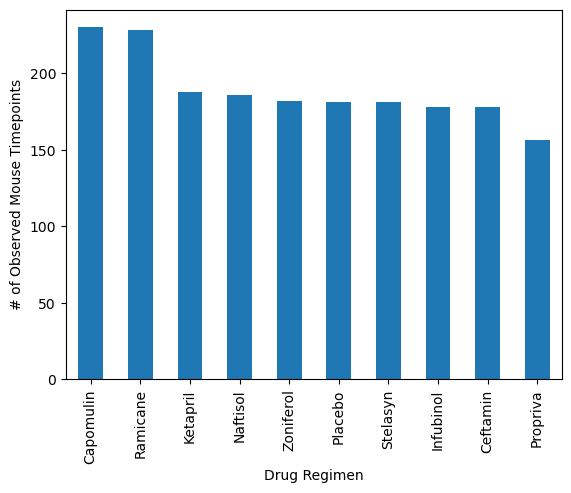

In [7]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
timepoint_df = cleaned_mice_ids["Drug Regimen"].value_counts().plot(kind="bar")
timepoint_df.set_xlabel("Drug Regimen")
timepoint_df.set_ylabel("# of Observed Mouse Timepoints")
timepoint_df

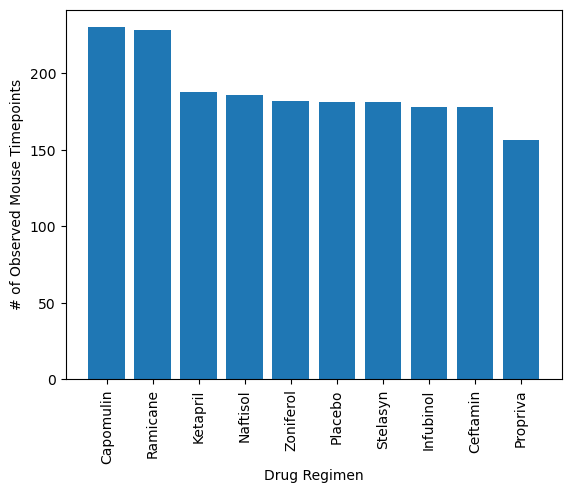

In [8]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
timepoint_counts = cleaned_mice_ids["Drug Regimen"].value_counts()

plt.bar(timepoint_counts.index, timepoint_counts)

plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

plt.xticks(rotation=90)

plt.show()

<Axes: ylabel='count'>

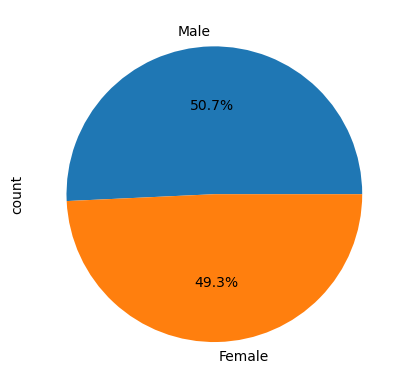

In [9]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
# Get the unique mice with their gender
gender_distribution_df = cleaned_mice_ids["Sex"].value_counts().plot(kind="pie", autopct='%1.1f%%')

# Make the pie chart
gender_distribution_df

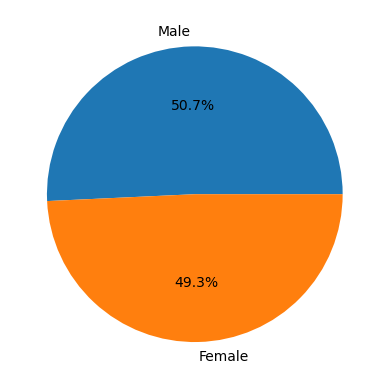

In [10]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
# Get the unique mice with their gender
gender_counts = cleaned_mice_ids["Sex"].value_counts()

# Make the pie chart
plt.pie(gender_counts, labels = gender_counts.index, autopct="%1.1f%%")
plt.show()

## Quartiles, Outliers and Boxplots

In [29]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = cleaned_mice_ids.groupby("Mouse ID")["Timepoint"].agg(max)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(cleaned_mice_ids, max_timepoint, on=["Mouse ID", "Timepoint"], how="inner")

final_tumor_volume.reset_index()

final_tumor_volume


C:\Users\Chris\AppData\Local\Temp\ipykernel_7680\238645614.py:5: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  max_timepoint = cleaned_mice_ids.groupby("Mouse ID")["Timepoint"].agg(max)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28,5,45.934712,0
245,z435,Propriva,Female,12,26,10,48.710661,0
246,z581,Infubinol,Female,24,25,45,62.754451,3
247,z795,Naftisol,Female,13,29,45,65.741070,3


In [30]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for treatment in treatments:

    #locate rows for each treatment
    treatment_data = final_tumor_volume[final_tumor_volume["Drug Regimen"] == treatment]

    #append final tumor volumes for current treatment to tumor_vol_data list
    tumor_vol_data.append(treatment_data["Tumor Volume (mm3)"])

    #calculate quartiles and IQR for current treatment 
    quartiles = treatment_data["Tumor Volume (mm3)"].quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq

    #determine upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    #check for outliers
    outliers = treatment_data.loc[(treatment_data["Tumor Volume (mm3)"] < lower_bound) | (treatment_data["Tumor Volume (mm3)"] > upper_bound)]

Text(0, 0.5, 'Final Tumor Volume (mm3)')

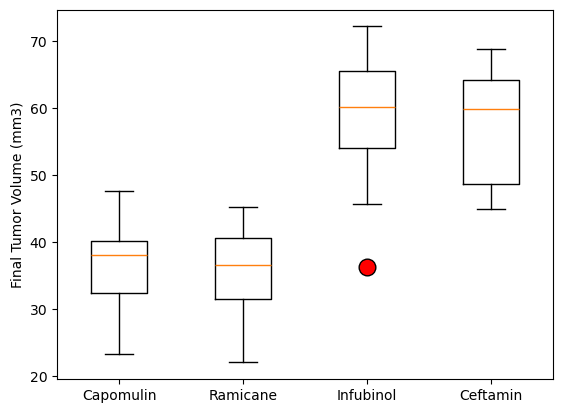

In [31]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
flierprops = dict(marker='o', markerfacecolor='red', markersize=12)

plt.boxplot(tumor_vol_data, labels = treatments, flierprops=flierprops)
plt.ylabel("Final Tumor Volume (mm3)")


## Line and Scatter Plots

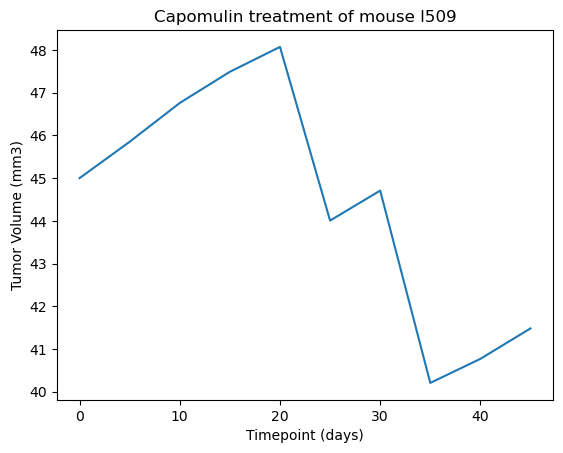

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


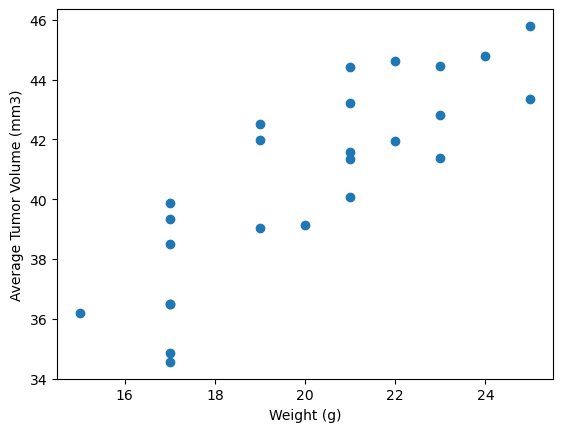

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


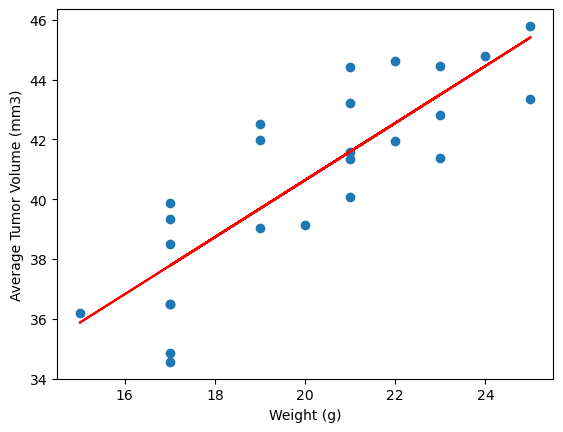

In [18]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
